<a href="https://colab.research.google.com/github/chi-hun/dacon/blob/main/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%82%AC%EA%B8%B0_%EA%B1%B0%EB%9E%98_%ED%83%90%EC%A7%80_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

신용카드 사기 거래 탐지 AI 경진대회 https://dacon.io/competitions/official/235930/overview/description

# import module

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

# data load


In [ ]:
train = pd.read_csv('/content/train.csv')
val = pd.read_csv('/content/val.csv')
test = pd.read_csv('/content/test.csv')

# EDA

In [ ]:
train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      113842 non-null  int64  
 1   V1      113842 non-null  float64
 2   V2      113842 non-null  float64
 3   V3      113842 non-null  float64
 4   V4      113842 non-null  float64
 5   V5      113842 non-null  float64
 6   V6      113842 non-null  float64
 7   V7      113842 non-null  float64
 8   V8      113842 non-null  float64
 9   V9      113842 non-null  float64
 10  V10     113842 non-null  float64
 11  V11     113842 non-null  float64
 12  V12     113842 non-null  float64
 13  V13     113842 non-null  float64
 14  V14     113842 non-null  float64
 15  V15     113842 non-null  float64
 16  V16     113842 non-null  float64
 17  V17     113842 non-null  float64
 18  V18     113842 non-null  float64
 19  V19     113842 non-null  float64
 20  V20     113842 non-null  float64
 21  V21     11

In [ ]:
train.isna().sum().sum()

0

In [ ]:
test.isna().sum().sum()

0

In [ ]:
train.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,1.138420e+05,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000,113842.000000
mean,142025.527837,0.000197,0.001289,0.009717,-0.004169,0.000475,0.005141,0.005769,-0.002451,-0.002107,0.005209,-0.001686,0.003944,0.002043,0.004397,-0.000500,0.002905,0.003397,0.001114,0.000300,-0.000500,-0.001242,4.088347e-07,-0.001317,-0.000884,0.001680,-0.000293,-0.000234,-0.000508,0.927253,0.116232
std,82248.545392,1.951060,1.651064,1.496916,1.412633,1.367533,1.330583,1.204111,1.185504,1.095415,1.071337,1.014689,0.977039,0.994908,0.933753,0.915666,0.864903,0.808552,0.830763,0.814542,0.763326,0.722001,7.238291e-01,0.636061,0.605854,0.520069,0.480979,0.399505,0.356130,3.412933,0.558161
min,3.000000,-56.407510,-72.715728,-32.454198,-5.600607,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,-4.682931,-18.553697,-3.844974,-15.623187,-4.152532,-13.303888,-21.297906,-8.668815,-4.932733,-28.009635,-22.757540,-8.887017e+00,-44.807735,-2.824849,-10.295397,-1.855355,-9.895244,-9.617915,-0.307413,-0.994972
25%,70796.750000,-0.923479,-0.595602,-0.883877,-0.853728,-0.689853,-0.766094,-0.552071,-0.209492,-0.647477,-0.533477,-0.763105,-0.402650,-0.647334,-0.423962,-0.584307,-0.467574,-0.486154,-0.497362,-0.456712,-0.211935,-0.229710,-5.402665e-01,-0.162180,-0.355582,-0.315470,-0.326160,-0.070847,-0.053249,-0.230560,-0.360304
50%,141722.000000,0.012074,0.066390,0.183868,-0.019359,-0.054060,-0.272436,0.039036,0.020970,-0.052157,-0.090810,-0.034405,0.141434,-0.010847,0.052157,0.048524,0.066434,-0.066939,-0.004633,0.004657,-0.062891,-0.030281,8.345807e-03,-0.012261,0.040573,0.018278,-0.052815,0.001502,0.011158,-0.000699,-0.002590
75%,213359.500000,1.315373,0.801687,1.037120,0.742208,0.614214,0.405285,0.568750,0.328303,0.590705,0.455287,0.739737,0.619635,0.663362,0.494116,0.646540,0.525120,0.397480,0.500335,0.461655,0.133381,0.186001,5.287508e-01,0.147474,0.438225,0.353989,0.240838,0.091279,0.077851,0.768532,0.640653
max,284803.000000,2.454930,21.467203,4.187811,16.491217,34.801666,23.917837,44.054461,20.007208,10.392889,15.331742,10.446847,4.318071,4.569009,7.518403,5.784514,8.289890,9.253526,4.295648,4.715142,26.237391,27.202839,8.361985e+00,22.528412,4.022866,7.519589,3.119295,11.135740,33.847808,180.101027,1.034951


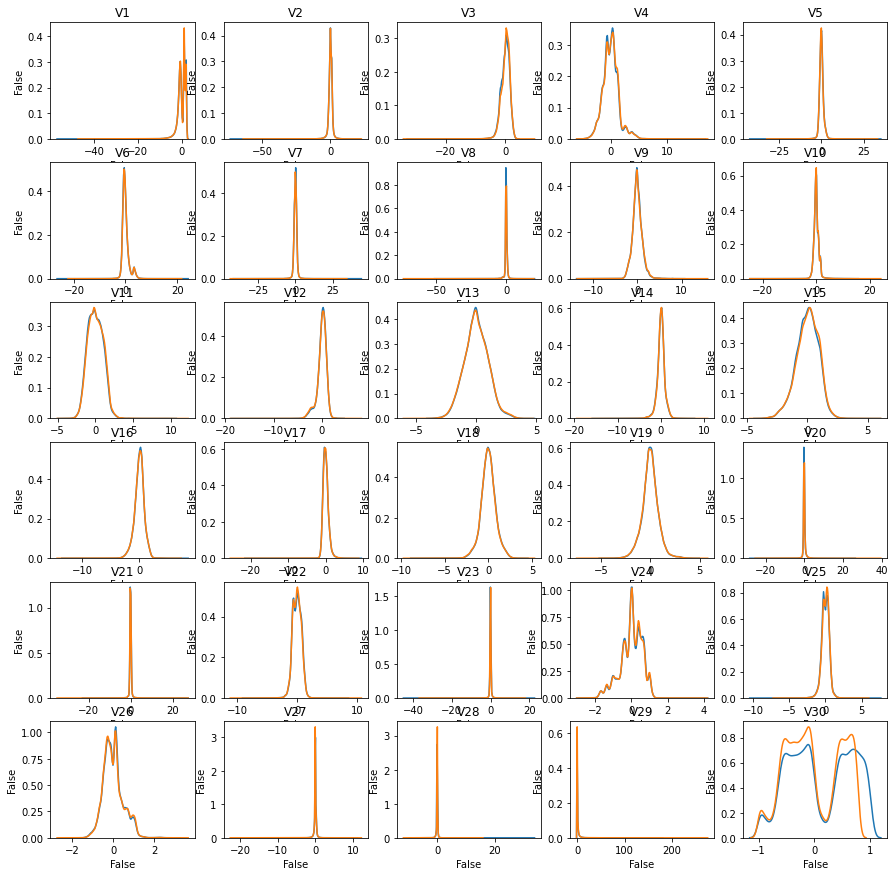

In [ ]:
plt.figure(figsize=(15,15))
for i in range(1,31):
    plt.subplot(6,5,i)
    plt.title(f'{train.columns[i]}')
    sns.kdeplot(train.iloc[:,i])
    sns.kdeplot(test.iloc[:,i])
    plt.xlabel(False)
    plt.ylabel(False)
plt.show()

In [ ]:
sns.pairplot(train.iloc[:,1:])
plt.show()

In [ ]:
x_train = train.copy()
x_test = test.copy()
_ = x_train.pop('ID')
_ = x_test.pop('ID')

# model(kmeasns)

In [ ]:
model = KMeans(n_clusters=2)
model.fit(x_train)

KMeans(n_clusters=2)

In [ ]:
fit_labels = model.labels_

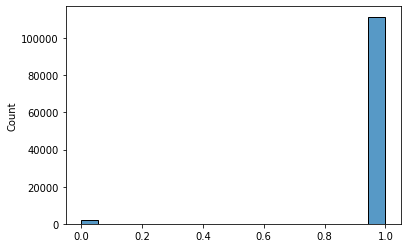

In [ ]:
sns.histplot(fit_labels)
plt.show()

In [ ]:
fit_labels = np.where(fit_labels == 0, 1, 0)
np.sum(fit_labels)

2281

In [ ]:
pre = model.predict(x_test)

In [ ]:
pre = np.where(pre == 0, 1, 0)

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
submission['Class'] = pre

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
ppp = model.predict((val.iloc[:,1:31]))

In [ ]:
ppp = np.where(ppp == 0, 1, 0)

In [ ]:
a = np.sum(ppp == val['Class'])

In [ ]:
(a / val.shape[0] ) *100

58.89255849905136

In [ ]:
ppp

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.array(val['Class']).sum()

30

In [ ]:
val.shape

(28462, 32)

In [ ]:
f1_score(np.array(val['Class']),ppp, average='macro')

0.4948440800099391

# model(IsolationForest)

In [ ]:
val_0, val_1 = val.Class.value_counts()
val_rate = val_1/val_0
val_rate

0.0010551491277433877

In [ ]:
model = IsolationForest(contamination=val_rate)
model.fit(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.0010551491277433877)

In [ ]:
pre_val = model.predict(val.iloc[:,1:31])

In [ ]:
pre_val = np.where(pre_val == 1, 0, pre_val)
pre_val = np.where(pre_val == -1, 1, pre_val)

In [ ]:
f1_score(np.array(val['Class']),pre_val, average='macro')

0.6997098595016618

In [ ]:
for i in [50,100,200]:
    model = IsolationForest(contamination=val_rate, n_estimators = i)
    model.fit(x_train)
    pre_val = model.predict(val.iloc[:,1:31])
    pre_val = np.where(pre_val == 1, 0, pre_val)
    pre_val = np.where(pre_val == -1, 1, pre_val)
    f1 = f1_score(np.array(val['Class']),pre_val, average='macro')
    print(f'{i} == f1 : {f1}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


50 == f1 : 0.7030820840915222


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


100 == f1 : 0.7112747113626281


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


200 == f1 : 0.6848862578069541


In [ ]:
for i in [70,100,150]:
    model = IsolationForest(contamination=val_rate, n_estimators = i)
    model.fit(x_train)
    pre_val = model.predict(val.iloc[:,1:31])
    pre_val = np.where(pre_val == 1, 0, pre_val)
    pre_val = np.where(pre_val == -1, 1, pre_val)
    f1 = f1_score(np.array(val['Class']),pre_val, average='macro')
    print(f'{i} == f1 : {f1}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


70 == f1 : 0.6720796742978351


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


100 == f1 : 0.7140043609762959


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


150 == f1 : 0.6961296335373144


In [ ]:
for i in [80,100,130]:
    model = IsolationForest(contamination=val_rate, n_estimators = i)
    model.fit(x_train)
    pre_val = model.predict(val.iloc[:,1:31])
    pre_val = np.where(pre_val == 1, 0, pre_val)
    pre_val = np.where(pre_val == -1, 1, pre_val)
    f1 = f1_score(np.array(val['Class']),pre_val, average='macro')
    print(f'{i} == f1 : {f1}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


80 == f1 : 0.6375617452765545


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


100 == f1 : 0.6695036068056041


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


130 == f1 : 0.6815104570472169


In [ ]:
for i in [120,140,130,110]:
    model = IsolationForest(contamination=val_rate, n_estimators = i)
    model.fit(x_train)
    pre_val = model.predict(val.iloc[:,1:31])
    pre_val = np.where(pre_val == 1, 0, pre_val)
    pre_val = np.where(pre_val == -1, 1, pre_val)
    f1 = f1_score(np.array(val['Class']),pre_val, average='macro')
    print(f'{i} == f1 : {f1}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


120 == f1 : 0.7030820840915222


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


140 == f1 : 0.6782549060983329


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


130 == f1 : 0.7072746231706779


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


110 == f1 : 0.6635739106042333


In [ ]:
model = IsolationForest(contamination=val_rate, n_estimators = 130)
model.fit(x_train)
pre_val = model.predict(val.iloc[:,1:31])
pre_val = np.where(pre_val == 1, 0, pre_val)
pre_val = np.where(pre_val == -1, 1, pre_val)
f1 = f1_score(np.array(val['Class']),pre_val, average='macro')
print(f'{130} == f1 : {f1}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


110 == f1 : 0.6961296335373144


In [ ]:
pre = model.predict(x_test)
pre = np.where(pre == 1, 0, pre)
pre = np.where(pre == -1, 1, pre)
pre

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['Class'] = pre
submission.to_csv('submission.csv', index= False)

# model(conv2D + kmeans)

In [ ]:
x_train_n = np.array(x_train)
x_train_n.shape

(113842, 30)

In [ ]:
x_test_n = np.array(x_test)
x_test_n.shape

(142503, 30)

In [ ]:
x_train_n = x_train_n.reshape(113842,6,5,1)

In [ ]:
x_test_n = x_test_n.reshape(142503,6,5,1)

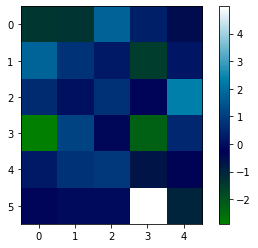

In [ ]:
plt.imshow(x_train_n[0][:,:,0], cmap='ocean')
plt.colorbar()
plt.show()

In [ ]:
def model_make1():
    inputs = layers.Input(shape = (6,5,1))
    x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
    x = layers.Conv2D(16, (2,2), padding = 'same', activation='elu')(x)
    x = layers.Conv2D(16, (2,2), activation='elu')(x)
    x = layers.Conv2D(32, (2,2),  padding = 'same', activation='elu')(x)
    x = layers.Conv2D(32, (2,2), activation='elu')(x)
    x = layers.Conv2D(64, (2,2),  padding = 'same', activation='elu')(x)
    x = layers.Conv2D(64, (2,2), activation='elu')(x)
    x = layers.MaxPool2D((2,2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='elu')(x)
    x = layers.Dense(64, activation='elu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

In [ ]:
model = model_make1()
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 6, 5, 1)]         0         
                                                                 
 rescaling_9 (Rescaling)     (None, 6, 5, 1)           0         
                                                                 
 conv2d_50 (Conv2D)          (None, 6, 5, 16)          80        
                                                                 
 conv2d_51 (Conv2D)          (None, 5, 4, 16)          1040      
                                                                 
 conv2d_52 (Conv2D)          (None, 5, 4, 32)          2080      
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 3, 32)          4128      
                                                                 
 conv2d_54 (Conv2D)          (None, 4, 3, 64)          8256

In [ ]:
model = tf.keras.Model(inputs = model.input, outputs = model.layers[10].output)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 6, 5, 1)]         0         
                                                                 
 rescaling_9 (Rescaling)     (None, 6, 5, 1)           0         
                                                                 
 conv2d_50 (Conv2D)          (None, 6, 5, 16)          80        
                                                                 
 conv2d_51 (Conv2D)          (None, 5, 4, 16)          1040      
                                                                 
 conv2d_52 (Conv2D)          (None, 5, 4, 32)          2080      
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 3, 32)          4128      
                                                                 
 conv2d_54 (Conv2D)          (None, 4, 3, 64)          8256

In [ ]:
x_train = model.predict(x_train_n)
x_test = model.predict(x_test_n)

In [ ]:
x_train.shape, x_test.shape

((113842, 128), (142503, 128))

In [ ]:
model_k = KMeans(n_clusters=2)
model_k.fit(x_train)

KMeans(n_clusters=2)

In [ ]:
x_val = val.iloc[:,1:31]
x_val_n = np.array(x_val)

In [ ]:
x_val_n.shape

(28462, 30)

In [ ]:
x_val_n = x_val_n.reshape(28462,6,5,1)
x_val = model.predict(x_val_n)

In [ ]:
pre_v = model_k.predict(x_val)
pre_v

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
f1_score(val['Class'], pre_v, average='macro')

0.494467238592565

In [ ]:
model_i = IsolationForest(contamination=val_rate)
model_i.fit(x_train)

IsolationForest(contamination=0.0010551491277433877)

In [ ]:
pre_val = model_i.predict(x_val)
pre_val = np.where(pre_val == 1, 0, pre_val)
pre_val = np.where(pre_val == -1, 1, pre_val)
f1 = f1_score(np.array(val['Class']),pre_val, average='macro')
print(f'{i} == f1 : {f1}')

110 == f1 : 0.49949883060474437
